# Data

In [3]:
from src.mtal.data_collect import get_pair_df
from src.mtal.data_collect import get_spot_pairs

cryptos = get_spot_pairs()

# df = get_pair_df(pair="BTCUSDT")
df = get_pair_df(pair="BTCUSDT", limit=900, frequency="1d")
df.head(14)

,Open Time,Open,High,Low,Close,Volume,Close Time
0,2021-11-23,56243.83,58009.99,55317.00,57541.27,49917.850170,2021-11-23 23:59:59.999
1,2021-11-24,57541.26,57735.00,55837.00,57138.29,39612.049640,2021-11-24 23:59:59.999
2,2021-11-25,57138.29,59398.90,57000.00,58960.36,42153.515220,2021-11-25 23:59:59.999
3,2021-11-26,58960.37,59150.00,53500.00,53726.53,65927.870660,2021-11-26 23:59:59.999
4,2021-11-27,53723.72,55280.00,53610.00,54721.03,29716.999570,2021-11-27 23:59:59.999
5,2021-11-28,54716.47,57445.05,53256.64,57274.88,36163.713700,2021-11-28 23:59:59.999
6,2021-11-29,57274.89,58865.97,56666.67,57776.25,40125.280090,2021-11-29 23:59:59.999
7,2021-11-30,57776.25,59176.99,55875.55,56950.56,49161.051940,2021-11-30 23:59:59.999
8,2021-12-01,56950.56,59053.55,56458.01,57184.07,44956.636560,2021-12-01 23:59:59.999
9,2021-12-02,57184.07,57375.47,55777.77,56480.34,37574.059760,2021-12-02 23:59:59.999


# EMA backtest

In [4]:
from src.mtal.utils import generate_pinescript
from src.mtal.backtesting.ma_cross_backtest import MACrossBacktester 

short_ema = 55 
long_ema = 59 

df = get_pair_df(pair="BTCUSDT", limit=900, frequency="1d")

tester = MACrossBacktester(
    short_ma=short_ema, long_ma=long_ema, data=df
)
results = tester.run()

entry_dates = [int(entry_date.timestamp() * 1000) for entry_date in results.entry_dates]
exit_dates = [int(exit_date.timestamp() * 1000) for exit_date in results.exit_dates]

print(results)


KeyboardInterrupt: 

In [ ]:
from itertools import combinations
from src.mtal.backtesting.ma_cross_backtest import MACrossBacktester


ema_values = range(1, 60)  

combinations = [(short_ema, long_ema) for short_ema, long_ema in combinations(ema_values, 2)]

results = {}

for short_ema, long_ema in combinations:
    tester = MACrossBacktester(short_ma=short_ema, long_ma=long_ema, data=df)
    test_results = tester.run()
    results[(short_ema, long_ema)] = test_results

best_combination = max(results, key=lambda x: results[x].pnl)  # Ajuster le critère si nécessaire
best_result = results[best_combination]

print(f"Meilleure combinaison: Short EMA = {best_combination[0]}, Long EMA = {best_combination[1]}")
print(f"Résultat du test: {best_result}")


Meilleure combinaison: Short EMA = 55, Long EMA = 59
Résultat du test: BacktestResults(pnl=2697.621393230537, pnl_percentage=1.6976213932305368, max_drawdown=0.25442455932371505, win_rate=1.0, average_return=0.7024548572963697, trade_number=2, entry_dates=[Timestamp('2023-01-19 23:59:59.999000'), Timestamp('2023-10-22 23:59:59.999000')], exit_dates=[Timestamp('2023-08-23 23:59:59.999000'), Timestamp('2024-04-25 23:59:59.999000')], entry_prices=[21071.59, 29992.46], exit_prices=[26432.72, 64498.34])


# EMA  price above

In [ ]:
from src.mtal.utils import generate_pinescript
from src.mtal.backtesting.ma_cross_backtest import MACrossPriceAboveBacktester 

short_ema = 19 
long_ema = 47 

df = get_pair_df(pair="BTCUSDT", limit=900, frequency="1d")

tester = MACrossPriceAboveBacktester(
    short_ma=short_ema, long_ma=long_ema, data=df
)
results = tester.run()

entry_dates = [int(entry_date.timestamp() * 1000) for entry_date in results.entry_dates]
exit_dates = [int(exit_date.timestamp() * 1000) for exit_date in results.exit_dates]

print(results)

BacktestResults(pnl=506.089915434442, pnl_percentage=0.506089915434442, max_drawdown=-0.10084847979491436, win_rate=0.3333333333333333, average_return=0.06034990954966727, trade_number=9, entry_dates=[Timestamp('2021-11-28 23:59:59.999000'), Timestamp('2022-03-24 23:59:59.999000'), Timestamp('2022-08-12 23:59:59.999000'), Timestamp('2022-10-30 23:59:59.999000'), Timestamp('2023-01-12 23:59:59.999000'), Timestamp('2023-03-13 23:59:59.999000'), Timestamp('2023-06-22 23:59:59.999000'), Timestamp('2023-10-05 23:59:59.999000'), Timestamp('2024-01-27 23:59:59.999000')], exit_dates=[Timestamp('2021-12-03 23:59:59.999000'), Timestamp('2022-04-08 23:59:59.999000'), Timestamp('2022-08-17 23:59:59.999000'), Timestamp('2022-11-08 23:59:59.999000'), Timestamp('2023-03-03 23:59:59.999000'), Timestamp('2023-04-21 23:59:59.999000'), Timestamp('2023-07-24 23:59:59.999000'), Timestamp('2023-10-11 23:59:59.999000'), Timestamp('2024-04-13 23:59:59.999000')], entry_prices=[57274.88, 43991.46, 24403.68, 206

In [ ]:
from itertools import combinations
from src.mtal.backtesting.ma_cross_backtest import MACrossPriceAboveBacktester


ema_values = range(1, 60)  

combinations = [(short_ema, long_ema) for short_ema, long_ema in combinations(ema_values, 2)]

results = {}

for short_ema, long_ema in combinations:
    tester = MACrossPriceAboveBacktester(short_ma=short_ema, long_ma=long_ema, data=df)
    test_results = tester.run()
    results[(short_ema, long_ema)] = test_results

best_combination = max(results, key=lambda x: results[x].pnl)  # Ajuster le critère si nécessaire
best_result = results[best_combination]

print(f"Meilleure combinaison: Short EMA = {best_combination[0]}, Long EMA = {best_combination[1]}")
print(f"Résultat du test: {best_result}")


Meilleure combinaison: Short EMA = 19, Long EMA = 47
Résultat du test: BacktestResults(pnl=2607.640337455214, pnl_percentage=2.6076403374552144, max_drawdown=-0.03862851230654122, win_rate=0.75, average_return=0.40636658069417786, trade_number=4, entry_dates=[Timestamp('2022-12-21 00:00:00'), Timestamp('2023-06-23 00:00:00'), Timestamp('2023-10-06 00:00:00'), Timestamp('2024-01-28 00:00:00')], exit_dates=[Timestamp('2023-05-18 00:00:00'), Timestamp('2023-08-17 00:00:00'), Timestamp('2024-01-27 00:00:00'), Timestamp('2024-04-30 00:00:00')], entry_prices=[16896.15, 29884.92, 27410.39, 42120.63], exit_prices=[27405.62, 28730.51, 41823.51, 63866.0], profit_pct_history=[0.6220038292747162, -0.03862851230654122, 0.5258268853525981, 0.5162641204559382], profit_history=[622.0038292747162, -62.65559488039536, 819.947225271639, 1228.344877789254])


# VWMA cross 

In [ ]:
from src.mtal.utils import generate_pinescript
from src.mtal.backtesting.ma_cross_backtest import MACrossBacktester 

short_ema = 56 
long_ema = 58 

df = get_pair_df(pair="BTCUSDT", limit=900, frequency="1d")

tester = MACrossBacktester(short_ma=short_ema, long_ma=long_ema, data=df, ma_type="vwma"
)
results = tester.run()

entry_dates = [int(entry_date.timestamp() * 1000) for entry_date in results.entry_dates]
exit_dates = [int(exit_date.timestamp() * 1000) for exit_date in results.exit_dates]

print(results)
# print(generate_pinescript(entry_dates, exit_dates))



BacktestResults(pnl=1159.5127621144893, pnl_percentage=1.1595127621144894, max_drawdown=-0.2459359246307465, win_rate=0.4375, average_return=0.07763763819426156, trade_number=16, entry_dates=[Timestamp('2022-03-18 23:59:59.999000'), Timestamp('2022-04-15 23:59:59.999000'), Timestamp('2022-04-29 23:59:59.999000'), Timestamp('2022-08-11 23:59:59.999000'), Timestamp('2022-09-20 23:59:59.999000'), Timestamp('2022-11-01 23:59:59.999000'), Timestamp('2022-11-16 23:59:59.999000'), Timestamp('2022-11-20 23:59:59.999000'), Timestamp('2023-01-05 23:59:59.999000'), Timestamp('2023-01-08 23:59:59.999000'), Timestamp('2023-04-16 23:59:59.999000'), Timestamp('2023-04-19 23:59:59.999000'), Timestamp('2023-05-28 23:59:59.999000'), Timestamp('2023-07-04 23:59:59.999000'), Timestamp('2023-10-13 23:59:59.999000'), Timestamp('2024-02-05 23:59:59.999000')], exit_dates=[Timestamp('2022-04-03 23:59:59.999000'), Timestamp('2022-04-26 23:59:59.999000'), Timestamp('2022-05-11 23:59:59.999000'), Timestamp('2022-

In [ ]:
from itertools import combinations
from src.mtal.backtesting.ma_cross_backtest import MACrossBacktester


ema_values = range(1, 60)  

combinations = [(short_ema, long_ema) for short_ema, long_ema in combinations(ema_values, 2)]

results = {}

for short_ema, long_ema in combinations:
    tester = MACrossBacktester(short_ma=short_ema, long_ma=long_ema, data=df, ma_type="vwma")
    test_results = tester.run()
    results[(short_ema, long_ema)] = test_results

best_combination = max(results, key=lambda x: results[x].pnl)  # Ajuster le critère si nécessaire
best_result = results[best_combination]

print(f"Meilleure combinaison: Short EMA = {best_combination[0]}, Long EMA = {best_combination[1]}")
print(f"Résultat du test: {best_result}")


/home/romain/mtal/src/mtal/analysis.py:64: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[get_ma_names(span, "vwma")] = vwma
/home/romain/mtal/src/mtal/analysis.py:64: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[get_ma_names(span, "vwma")] = vwma
/home/romain/mtal/src/mtal/analysis.py:64: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragment

Meilleure combinaison: Short EMA = 56, Long EMA = 58
Résultat du test: BacktestResults(pnl=3577.2975760474555, pnl_percentage=2.5772975760474557, max_drawdown=-0.17333902100011148, win_rate=0.6, average_return=0.1732078101534478, trade_number=10, entry_dates=[Timestamp('2022-03-19 23:59:59.999000'), Timestamp('2022-08-12 23:59:59.999000'), Timestamp('2022-11-02 23:59:59.999000'), Timestamp('2023-01-06 23:59:59.999000'), Timestamp('2023-01-09 23:59:59.999000'), Timestamp('2023-04-17 23:59:59.999000'), Timestamp('2023-04-20 23:59:59.999000'), Timestamp('2023-07-05 23:59:59.999000'), Timestamp('2023-10-14 23:59:59.999000'), Timestamp('2024-02-06 23:59:59.999000')], exit_dates=[Timestamp('2022-04-04 23:59:59.999000'), Timestamp('2022-09-13 23:59:59.999000'), Timestamp('2022-11-05 23:59:59.999000'), Timestamp('2023-01-07 23:59:59.999000'), Timestamp('2023-04-16 23:59:59.999000'), Timestamp('2023-04-18 23:59:59.999000'), Timestamp('2023-05-28 23:59:59.999000'), Timestamp('2023-08-18 23:59:59

# VWMA above

In [ ]:
from src.mtal.backtesting.ma_cross_backtest import MACrossPriceAboveBacktester 

short_ema = 2 
long_ema = 5

df = get_pair_df(pair="BTCUSDT", limit=900, frequency="1d")

tester = MACrossPriceAboveBacktester(short_ma=short_ema, long_ma=long_ema, data=df, ma_type="vwma"
)
results = tester.run()

entry_dates = [int(entry_date.timestamp() * 1000) for entry_date in results.entry_dates]
exit_dates = [int(exit_date.timestamp() * 1000) for exit_date in results.exit_dates]

print(results)

BacktestResults(pnl=1340.095983977189, pnl_percentage=1.340095983977189, max_drawdown=-0.09045173786605241, win_rate=0.39325842696629215, average_return=0.011773915644904986, trade_number=89, entry_dates=[Timestamp('2021-11-29 23:59:59.999000'), Timestamp('2021-12-07 23:59:59.999000'), Timestamp('2021-12-12 23:59:59.999000'), Timestamp('2021-12-15 23:59:59.999000'), Timestamp('2021-12-20 23:59:59.999000'), Timestamp('2022-01-02 23:59:59.999000'), Timestamp('2022-01-11 23:59:59.999000'), Timestamp('2022-01-25 23:59:59.999000'), Timestamp('2022-02-04 23:59:59.999000'), Timestamp('2022-02-15 23:59:59.999000'), Timestamp('2022-02-24 23:59:59.999000'), Timestamp('2022-02-28 23:59:59.999000'), Timestamp('2022-03-09 23:59:59.999000'), Timestamp('2022-03-15 23:59:59.999000'), Timestamp('2022-03-22 23:59:59.999000'), Timestamp('2022-04-04 23:59:59.999000'), Timestamp('2022-04-18 23:59:59.999000'), Timestamp('2022-04-25 23:59:59.999000'), Timestamp('2022-04-28 23:59:59.999000'), Timestamp('2022-

In [ ]:
from itertools import combinations
from src.mtal.backtesting.ma_cross_backtest import MACrossPriceAboveBacktester 

ema_values = range(1, 60)  
combinations = [(short_ema, long_ema) for short_ema, long_ema in combinations(ema_values, 2)]

results = {}

for short_ema, long_ema in combinations:
    tester = MACrossPriceAboveBacktester(short_ma=short_ema, long_ma=long_ema, data=df, ma_type="vwma")
    test_results = tester.run()
    results[(short_ema, long_ema)] = test_results

best_combination = max(results, key=lambda x: results[x].pnl)  # Ajuster le critère si nécessaire
best_result = results[best_combination]

print(f"Meilleure combinaison: Short EMA = {best_combination[0]}, Long EMA = {best_combination[1]}")
print(f"Résultat du test: {best_result}")

Meilleure combinaison: Short EMA = 2, Long EMA = 5
Résultat du test: BacktestResults(pnl=3115.5126566516756, pnl_percentage=3.1155126566516755, max_drawdown=-0.04734561471993561, win_rate=0.5111111111111111, average_return=0.03486297837435225, trade_number=45, entry_dates=[Timestamp('2022-12-25 23:59:59.999000'), Timestamp('2023-01-02 23:59:59.999000'), Timestamp('2023-01-20 23:59:59.999000'), Timestamp('2023-02-01 23:59:59.999000'), Timestamp('2023-02-13 23:59:59.999000'), Timestamp('2023-03-02 23:59:59.999000'), Timestamp('2023-03-12 23:59:59.999000'), Timestamp('2023-03-26 23:59:59.999000'), Timestamp('2023-03-29 23:59:59.999000'), Timestamp('2023-04-05 23:59:59.999000'), Timestamp('2023-04-09 23:59:59.999000'), Timestamp('2023-04-25 23:59:59.999000'), Timestamp('2023-05-03 23:59:59.999000'), Timestamp('2023-05-15 23:59:59.999000'), Timestamp('2023-05-23 23:59:59.999000'), Timestamp('2023-05-27 23:59:59.999000'), Timestamp('2023-06-09 23:59:59.999000'), Timestamp('2023-06-16 23:59:5

EMA price above + close en dessous de la long: 2-5 nous donne un bon x3

# HMA cross

In [ ]:
from itertools import combinations
from src.mtal.backtesting.ma_cross_backtest import MACrossPriceAboveBacktester 

ema_values = range(2, 60)  
combinations = [(short_ema, long_ema) for short_ema, long_ema in combinations(ema_values, 2)]

results = {}

for short_ema, long_ema in combinations:
    tester = MACrossPriceAboveBacktester(short_ma=short_ema, long_ma=long_ema, data=df, ma_type="hma")
    test_results = tester.run()
    results[(short_ema, long_ema)] = test_results

best_combination = max(results, key=lambda x: results[x].pnl)
best_result = results[best_combination]

print(f"Meilleure combinaison: Short EMA = {best_combination[0]}, Long EMA = {best_combination[1]}")
print(f"Résultat du test: {best_result}")

Meilleure combinaison: Short EMA = 6, Long EMA = 15
Résultat du test: BacktestResults(pnl=2716.3159239382962, pnl_percentage=2.7163159239382964, max_drawdown=-0.04331413447480797, win_rate=0.5121951219512195, average_return=0.035472466141545, trade_number=41, entry_dates=[Timestamp('2023-01-01 23:59:59.999000'), Timestamp('2023-01-21 23:59:59.999000'), Timestamp('2023-02-13 23:59:59.999000'), Timestamp('2023-03-07 23:59:59.999000'), Timestamp('2023-03-12 23:59:59.999000'), Timestamp('2023-03-30 23:59:59.999000'), Timestamp('2023-04-09 23:59:59.999000'), Timestamp('2023-04-24 23:59:59.999000'), Timestamp('2023-05-05 23:59:59.999000'), Timestamp('2023-05-14 23:59:59.999000'), Timestamp('2023-05-23 23:59:59.999000'), Timestamp('2023-05-27 23:59:59.999000'), Timestamp('2023-06-08 23:59:59.999000'), Timestamp('2023-06-13 23:59:59.999000'), Timestamp('2023-06-16 23:59:59.999000'), Timestamp('2023-07-03 23:59:59.999000'), Timestamp('2023-07-10 23:59:59.999000'), Timestamp('2023-07-21 23:59:59

# VZO-RSI

In [ ]:
from src.mtal.backtesting.vzo_rsi import VZO_RSI_let_grey
from src.mtal.data_collect import get_pair_df
from src.mtal.data_collect import get_spot_pairs
from src.mtal.utils import generate_pinescript

cryptos = get_spot_pairs()
df = get_pair_df(pair="BTCUSDT", limit=900, frequency="1d")

tester = VZO_RSI_let_grey(data=df, grey_zone=5, span=14)
results = tester.run()

entry_dates = [int(entry_date.timestamp() * 1000) for entry_date in results.entry_dates]
exit_dates = [int(exit_date.timestamp() * 1000) for exit_date in results.exit_dates]

# print(generate_pinescript(entry_dates=entry_dates, exit_dates=exit_dates))
print(results)

BacktestResults(pnl=256.1130709382244, pnl_percentage=0.2561130709382244, max_drawdown=-0.20047062127843182, win_rate=0.35294117647058826, average_return=0.031009141606314503, trade_number=17, entry_dates=[Timestamp('2021-11-25 23:59:59.999000'), Timestamp('2021-12-23 23:59:59.999000'), Timestamp('2022-02-04 23:59:59.999000'), Timestamp('2022-02-28 23:59:59.999000'), Timestamp('2022-03-18 23:59:59.999000'), Timestamp('2022-07-18 23:59:59.999000'), Timestamp('2022-09-10 23:59:59.999000'), Timestamp('2022-10-04 23:59:59.999000'), Timestamp('2022-10-25 23:59:59.999000'), Timestamp('2022-12-13 23:59:59.999000'), Timestamp('2023-01-08 23:59:59.999000'), Timestamp('2023-03-13 23:59:59.999000'), Timestamp('2023-04-27 23:59:59.999000'), Timestamp('2023-05-28 23:59:59.999000'), Timestamp('2023-06-20 23:59:59.999000'), Timestamp('2023-09-19 23:59:59.999000'), Timestamp('2024-01-29 23:59:59.999000')], exit_dates=[Timestamp('2021-12-10 23:59:59.999000'), Timestamp('2021-12-29 23:59:59.999000'), Ti

In [1]:
from src.mtal.backtesting.vzo_rsi import VZO_RSI
from src.mtal.data_collect import get_pair_df
from src.mtal.data_collect import get_spot_pairs
from src.mtal.utils import generate_pinescript

cryptos = get_spot_pairs()
df = get_pair_df(pair="BTCUSDT", limit=900, frequency="1d")

tester = VZO_RSI(data=df, grey_zone_rsi=2, span=13)
results = tester.run()

entry_dates = [int(entry_date.timestamp() * 1000) for entry_date in results.entry_dates]
exit_dates = [int(exit_date.timestamp() * 1000) for exit_date in results.exit_dates]

# print(generate_pinescript(entry_dates=entry_dates, exit_dates=exit_dates))
print(results)

BacktestResults(pnl=533.3116251098211, normalized_pnl=6.201297966393269, pnl_percentage=0.5333116251098211, max_drawdown=-0.13570857078919538, win_rate=0.26744186046511625, average_return=0.00682074253077611, trade_number=86, entry_dates=[Timestamp('2021-11-29 23:59:59.999000'), Timestamp('2021-12-01 23:59:59.999000'), Timestamp('2021-12-15 23:59:59.999000'), Timestamp('2021-12-21 23:59:59.999000'), Timestamp('2021-12-23 23:59:59.999000'), Timestamp('2022-01-28 23:59:59.999000'), Timestamp('2022-02-15 23:59:59.999000'), Timestamp('2022-02-24 23:59:59.999000'), Timestamp('2022-02-28 23:59:59.999000'), Timestamp('2022-03-19 23:59:59.999000'), Timestamp('2022-03-22 23:59:59.999000'), Timestamp('2022-04-07 23:59:59.999000'), Timestamp('2022-04-13 23:59:59.999000'), Timestamp('2022-04-18 23:59:59.999000'), Timestamp('2022-04-28 23:59:59.999000'), Timestamp('2022-05-02 23:59:59.999000'), Timestamp('2022-05-04 23:59:59.999000'), Timestamp('2022-05-31 23:59:59.999000'), Timestamp('2022-06-06 2

In [2]:
from src.mtal.data_collect import get_pair_df
from src.mtal.data_collect import get_spot_pairs
from src.mtal.trainer import train_strategy
from src.mtal.backtesting.vzo_rsi import VZO_RSI_let_grey

cryptos = get_spot_pairs()
df = get_pair_df(pair="BTCUSDT", limit=900, frequency="1d")

ranges = {
        "span": range(4, 20),
        "grey_zone_rsi": range(-10, 10),
        "grey_zone_vzo": range(-10, 10),
}

best_params, train_results, test_results = train_strategy(df, VZO_RSI_let_grey, ranges)

print(best_params)
print(train_results)
print(test_results)

(14, -10, 8)
BacktestResults(pnl=498.4115515979677, pnl_percentage=0.4984115515979677, max_drawdown=-0.11421336313342959, win_rate=0.3870967741935484, average_return=0.017386113948601754, trade_number=31, entry_dates=[Timestamp('2021-12-21 23:59:59.999000'), Timestamp('2022-01-31 23:59:59.999000'), Timestamp('2022-02-24 23:59:59.999000'), Timestamp('2022-03-18 23:59:59.999000'), Timestamp('2022-04-13 23:59:59.999000'), Timestamp('2022-04-28 23:59:59.999000'), Timestamp('2022-05-02 23:59:59.999000'), Timestamp('2022-05-31 23:59:59.999000'), Timestamp('2022-06-06 23:59:59.999000'), Timestamp('2022-07-16 23:59:59.999000'), Timestamp('2022-08-13 23:59:59.999000'), Timestamp('2022-09-09 23:59:59.999000'), Timestamp('2022-09-29 23:59:59.999000'), Timestamp('2022-10-04 23:59:59.999000'), Timestamp('2022-10-25 23:59:59.999000'), Timestamp('2022-11-04 23:59:59.999000'), Timestamp('2022-11-23 23:59:59.999000'), Timestamp('2022-12-13 23:59:59.999000'), Timestamp('2023-01-04 23:59:59.999000'), Tim

In [1]:
from src.mtal.data_collect import get_pair_df
from src.mtal.data_collect import get_spot_pairs
from src.mtal.trainer import train_strategy
from src.mtal.backtesting.ma_cross_backtest import MACrossPriceAboveBacktester 

cryptos = get_spot_pairs()
df = get_pair_df(pair="BTCUSDT", limit=900, frequency="1d")

ranges = {
        "short_ma": range(1, 50),
        "long_ma": range(1, 50),
        "ma_type": ["vwma", "ema", "hma"]
}

best_params, train_results, test_results = train_strategy(df, MACrossPriceAboveBacktester, ranges)

print(best_params)
print(train_results)
print(test_results)

(2, 15, 'hma')
BacktestResults(pnl=1364.619805765864, normalized_pnl=18.95305285785922, pnl_percentage=1.3646198057658638, max_drawdown=-0.09045173786605241, win_rate=0.4166666666666667, average_return=0.014669977482728533, trade_number=72, entry_dates=[Timestamp('2021-12-11 23:59:59.999000'), Timestamp('2021-12-14 23:59:59.999000'), Timestamp('2022-01-01 23:59:59.999000'), Timestamp('2022-01-09 23:59:59.999000'), Timestamp('2022-01-24 23:59:59.999000'), Timestamp('2022-02-04 23:59:59.999000'), Timestamp('2022-02-15 23:59:59.999000'), Timestamp('2022-02-22 23:59:59.999000'), Timestamp('2022-03-12 23:59:59.999000'), Timestamp('2022-03-14 23:59:59.999000'), Timestamp('2022-03-22 23:59:59.999000'), Timestamp('2022-04-25 23:59:59.999000'), Timestamp('2022-04-27 23:59:59.999000'), Timestamp('2022-05-01 23:59:59.999000'), Timestamp('2022-05-04 23:59:59.999000'), Timestamp('2022-05-12 23:59:59.999000'), Timestamp('2022-05-19 23:59:59.999000'), Timestamp('2022-05-24 23:59:59.999000'), Timestam

In [6]:
from src.mtal.backtesting.ma_cross_backtest import MACrossBacktester 

short_ema = 10
long_ema = 50 

df = get_pair_df(pair="BTCUSDT", limit=900, frequency="1d")

tester = MACrossBacktester(short_ma=short_ema, long_ma=long_ema, data=df, ma_type="hma"
)
results = tester.run()


print(results)

BacktestResults(pnl=-117.06133805054617, normalized_pnl=-3.2517038347373934, pnl_percentage=-0.11706133805054617, max_drawdown=-0.25852535996665077, win_rate=0.3333333333333333, average_return=0.0026510785721820373, trade_number=36, entry_dates=[Timestamp('2021-12-04 23:59:59.999000'), Timestamp('2022-01-29 23:59:59.999000'), Timestamp('2022-03-01 23:59:59.999000'), Timestamp('2022-03-16 23:59:59.999000'), Timestamp('2022-05-04 23:59:59.999000'), Timestamp('2022-05-19 23:59:59.999000'), Timestamp('2022-06-25 23:59:59.999000'), Timestamp('2022-07-28 23:59:59.999000'), Timestamp('2022-08-12 23:59:59.999000'), Timestamp('2022-09-09 23:59:59.999000'), Timestamp('2022-09-29 23:59:59.999000'), Timestamp('2022-10-17 23:59:59.999000'), Timestamp('2022-10-24 23:59:59.999000'), Timestamp('2022-11-25 23:59:59.999000'), Timestamp('2023-01-05 23:59:59.999000'), Timestamp('2023-02-17 23:59:59.999000'), Timestamp('2023-03-14 23:59:59.999000'), Timestamp('2023-04-12 23:59:59.999000'), Timestamp('2023-

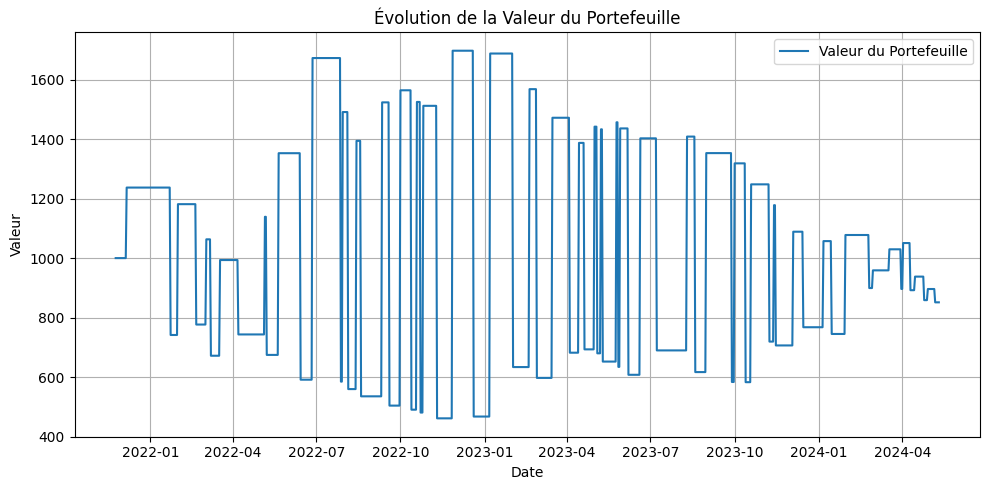

In [7]:
from src.mtal.dataviz import display_portfolio_value
from src.mtal.data_collect import get_pair_df
from src.mtal.data_collect import get_spot_pairs
from src.mtal.trainer import train_strategy
from src.mtal.backtesting.ma_cross_backtest import MACrossPriceAboveBacktester 

cryptos = get_spot_pairs()
df = get_pair_df(pair="BTCUSDT", limit=900, frequency="1d")
display_portfolio_value(df, results)